## Real Data Analysis

In [7]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
import os

In [8]:
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), ".."))) # Get the parent directory
from src.pipeline.data_extraction import DataExtraction

# Load the data
data_extract = DataExtraction()
data = data_extract.extract_data_from_supabase()

# Print the first few rows of the data
data.head()

2025-07-25 08:36:02,040 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-07-25 08:36:02,043 INFO sqlalchemy.engine.Engine SELECT network_data.id, network_data.time, network_data.latency_ms, network_data.jitter_ms, network_data.packet_loss, network_data.rssi_dbm, network_data.interface, network_data.download_mbps, network_data.upload_mbps, network_data.cpu_usage, network_data.ram_usage, network_data.device_count, network_data.temp 
FROM network_data
2025-07-25 08:36:02,045 INFO sqlalchemy.engine.Engine [cached since 50.98s ago] {}
2025-07-25 08:36:02,275 INFO sqlalchemy.engine.Engine ROLLBACK


,latency_ms,packet_loss,time,interface,upload_mbps,ram_usage,temp,jitter_ms,id,rssi_dbm,download_mbps,cpu_usage,device_count
0,17.173,0.0,2025-07-21 08:54:16.573397+00:00,nmap,38.39,78.3,47.2,0.768,996970c3-5cc2-4666-adb5-76b5ce1412d3,-19,100.63,5.0,6
1,17.238,0.0,2025-07-21 12:44:09.485153+00:00,nmap,NaN,67.0,45.7,0.717,4db743f2-4248-4a77-85e6-83da3f6883d7,-15,NaN,7.5,6
2,17.165,0.0,2025-07-21 12:51:04.539047+00:00,nmap,0.00,67.8,46.2,1.024,e1074c0f-d41a-450a-90b8-1971062e730d,-13,0.00,5.3,6
3,17.177,0.0,2025-07-21 12:56:15.429612+00:00,nmap,0.00,65.6,45.2,0.897,f26b6417-c473-4e4c-b755-97367c97622b,-16,0.00,7.1,5
4,17.423,0.0,2025-07-22 04:32:59.924587+00:00,nmap,0.00,15.4,39.4,0.973,10ba122a-beca-401e-aaf0-b69bc7a56c55,-22,0.00,30.0,4


### Data Preprocessing

In [9]:
# Drop unnecessary columns
data = data.drop(columns=["id"], axis=1)
print("Data columns has been dropped successfully.")

# Check for missing values
missing_values = data.isnull().sum()
print(f"Missing values in each columns : {missing_values}")

Data columns has been dropped successfully.
Missing values in each columns : latency_ms       0
packet_loss      0
time             0
interface        0
upload_mbps      1
ram_usage        0
temp             0
jitter_ms        0
rssi_dbm         0
download_mbps    1
cpu_usage        0
device_count     0
dtype: int64


In [10]:
# Check the download and upload columns value
print("Download Column Values")
print(data["download_mbps"].value_counts())

print("\n")

print("Upload Column Values")
print(data["upload_mbps"].value_counts())

Download Column Values
download_mbps
0.00      657
100.63      1
Name: count, dtype: int64


Upload Column Values
upload_mbps
0.00     657
38.39      1
Name: count, dtype: int64


In [11]:
# Dropped the columns with all missing values
data = data.drop(columns=["download_mbps", "upload_mbps"], axis=1)
print("Columns with all missing values have been dropped successfully.")

# Check the data types of the columns
print("Data Types of the Columns")
print(data.dtypes)

# Set the time as index
data.set_index("time", inplace=True)

Columns with all missing values have been dropped successfully.
Data Types of the Columns
latency_ms                  float64
packet_loss                 float64
time            datetime64[ns, UTC]
interface                    object
ram_usage                   float64
temp                        float64
jitter_ms                   float64
rssi_dbm                      int64
cpu_usage                   float64
device_count                  int64
dtype: object


### Exploratory Data Analysis

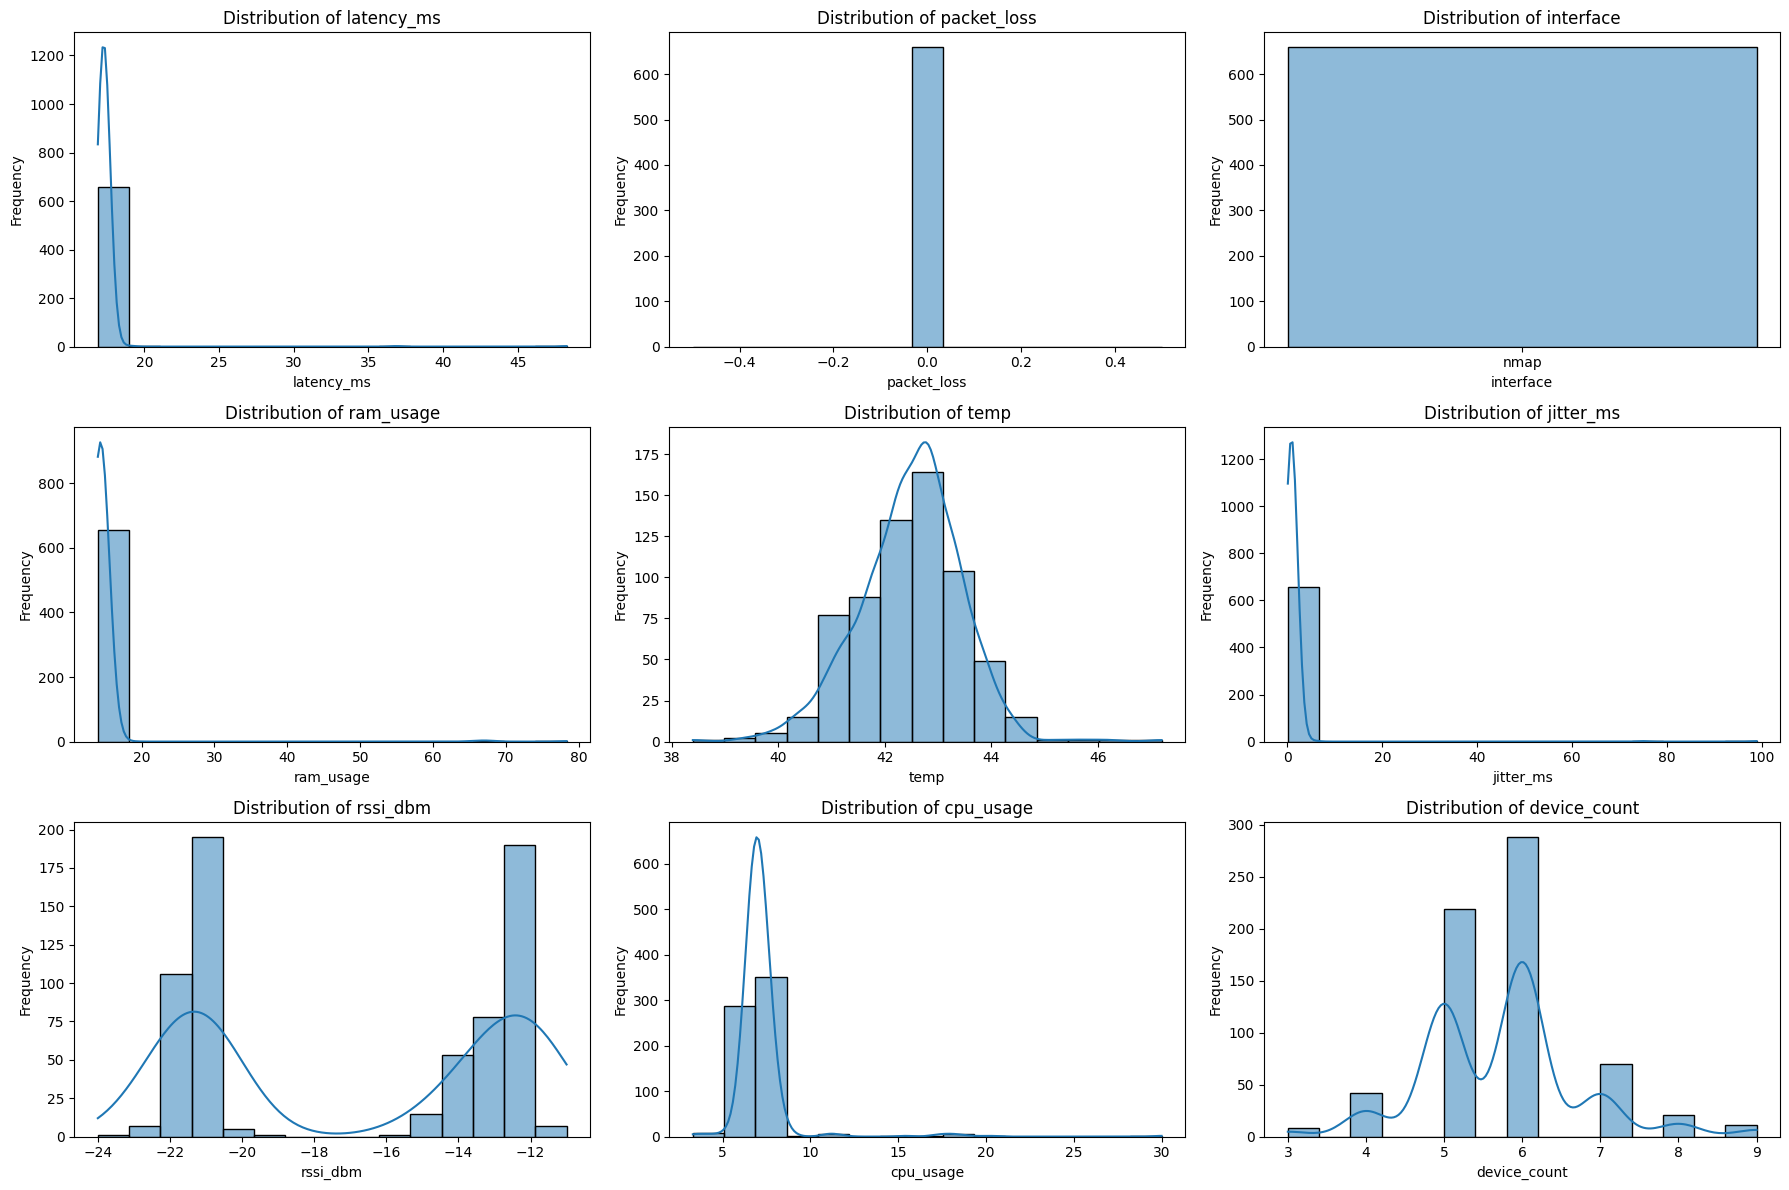

In [24]:
# Create distribution plots for each column
import seaborn as sns

# Define the number of columns and rows for subplots
num_cols = data.shape[1]
num_of_cols = 3
num_of_rows = (num_cols + num_of_cols - 1) // num_of_cols

# Setup canvas for subplots
fig, axes = plt.subplots(num_of_rows, num_of_cols, figsize=(18, 4 * num_of_rows))
axes = axes.flatten()

# Plot each column's distribution
for i, column in enumerate(data.columns):
  sns.histplot(data[column], ax=axes[i], kde=True, bins=15)
  axes[i].set_title(f'Distribution of {column}')
  axes[i].set_xlabel(column)
  axes[i].set_ylabel('Frequency')

# Delete empty subplots if cols not even
for j in range(i + 1, len(axes)):
  fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

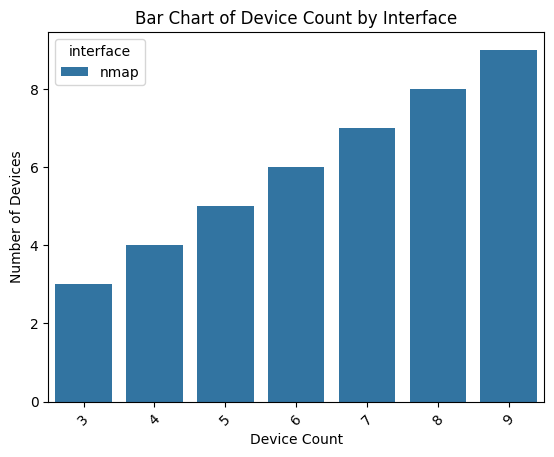

In [33]:
# Bar chart plot for categorical columns
sns.barplot(data=data, x="device_count", y="device_count", hue="interface")
plt.title("Bar Chart of Device Count by Interface")
plt.xlabel("Device Count")
plt.ylabel("Number of Devices")
plt.xticks(rotation=45)
plt.show()

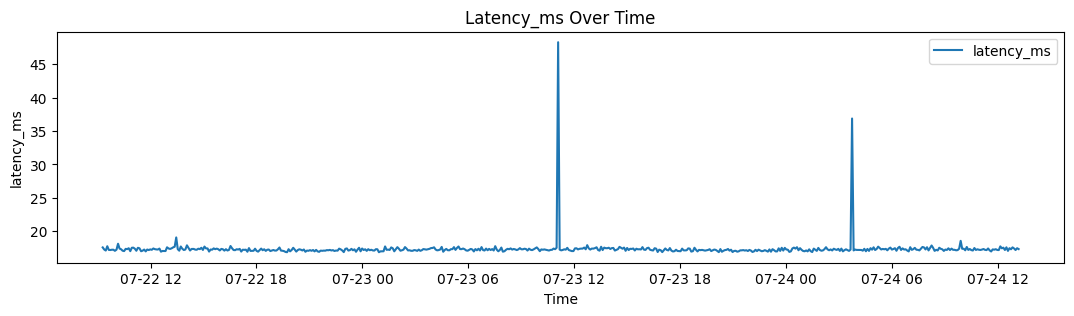

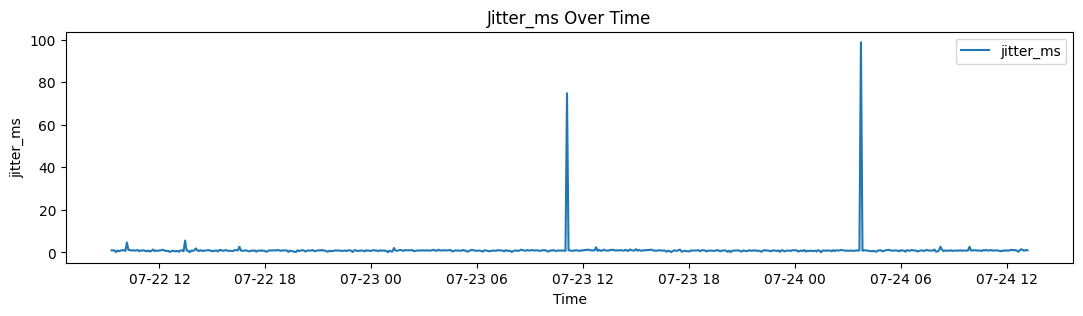

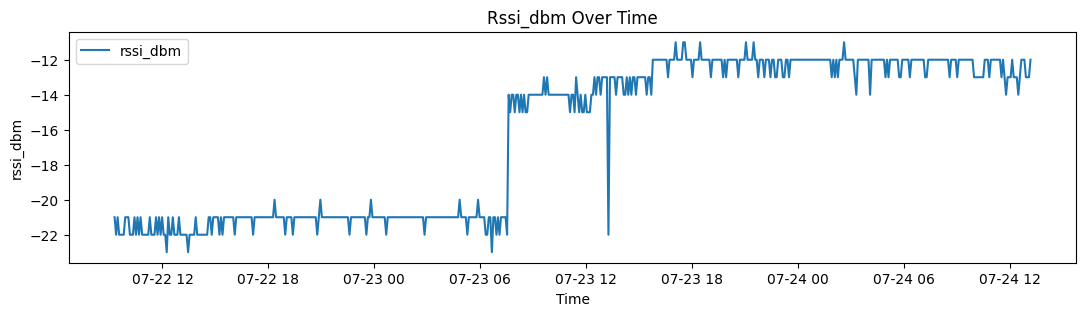

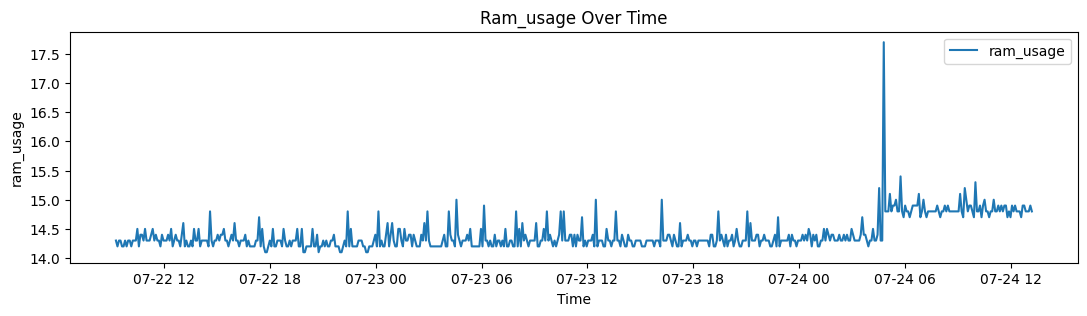

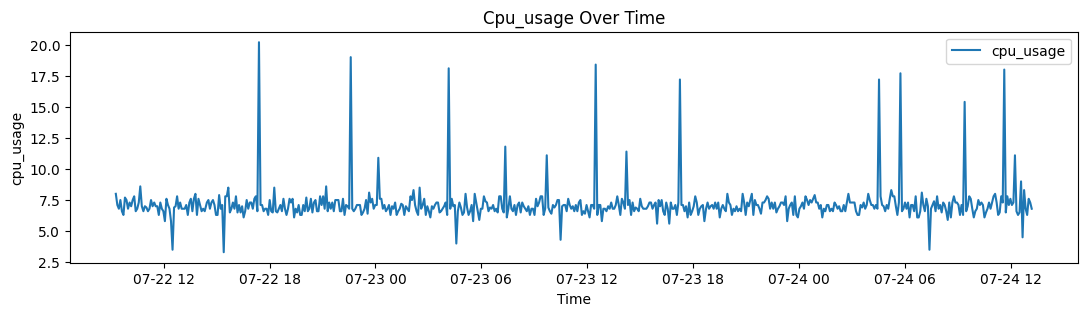

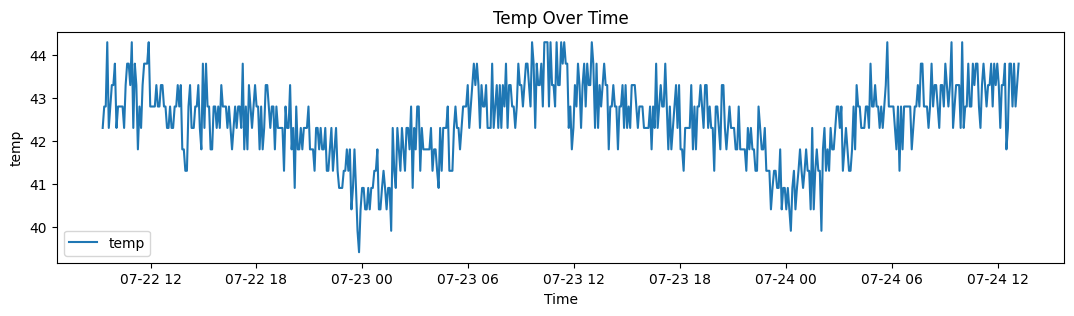

In [55]:
# Line chart plot for time series data
data = data.iloc[4:]

# Define lists of data to be plotted
data_to_plot = ["latency_ms", "jitter_ms", "rssi_dbm", "ram_usage", "cpu_usage", "temp"]

for column in data_to_plot:
  plt.figure(figsize=(13, 3))
  plt.plot(data.index, data[column], label=column)
  plt.title(f"{column.capitalize()} Over Time")
  plt.xlabel("Time")
  plt.ylabel(column)
  plt.legend()
  plt.show()
